# In Black Jack, what is the probability of getting exactly 21 after drawing an Ace, then a card equal to 10? Assume no other cards have been drawn before these.

In the game of Blackjack, the only way to get a perfect 21 using two cards is to draw an Ace and a 10, a King, a Queen, or a Jack. The random variables I will be observing are my chances of drawing an Ace, then pulling a 10, King, Queen, or a Jack. I've played blackjack 21 before, and I know it's very unlikely to pull an ace, then a value of ten right after, so I'm going to assume that the chances of getting these cards back-to-back are under 4%.

# For the theoretical, there are 4 Aces out of 52 (1/13) and 16 out of 51 because we would be down a card (16/51). To find our final answer, we would need to multiply these fractions. After multiplying these, our theoretical states a 2.41% chance of pulling those cards in that order.

In [10]:
import random
import seaborn as sns

In [6]:
!pip install gymnasium
!pip install "gymnasium[toy-text]"
!pip install ale-py
!pip install autorom[accept-rom-license]

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/10.6 MB 20.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.6 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 19.6 MB/s eta 0:00:00


In [2]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

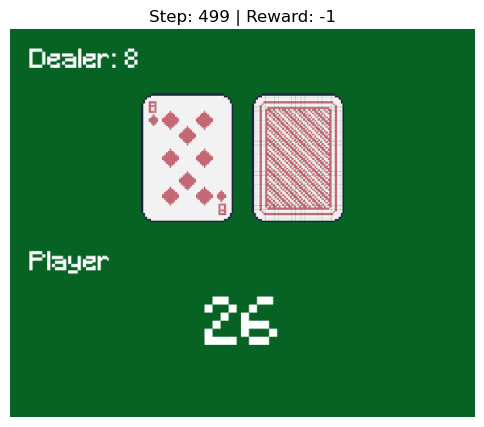

In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment
env = gym.make('Blackjack-v1', render_mode='rgb_array')
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Clear and update display
    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    
    display(fig)
    
    # Add delay to make it visible (adjust this value)
    time.sleep(0.03)  # 30ms delay = ~33 fps
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()

# This is to find how many times you can draw an Ace first card out of 100 trials

In [11]:
ace = {
   "Side": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "Frequency": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
}

for i in range(100):  
    number = random.randint(1, 13) 
    ace["Frequency"][number-1] += 1

<Axes: xlabel='Side', ylabel='Frequency'>

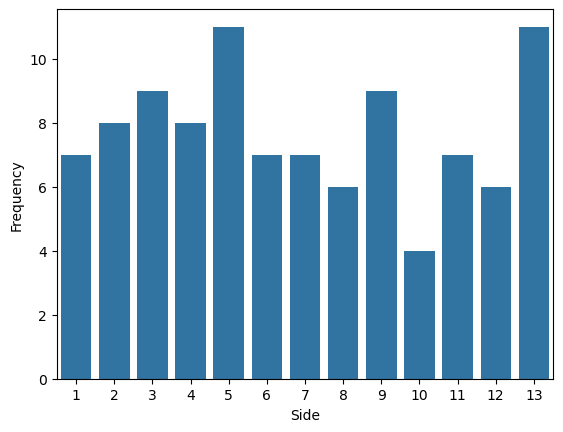

In [12]:
sns.barplot(data=ace, x="Side", y="Frequency")

Out of 100 trials, the ace was pulled 7 times as the first card

 # This is to find out how many times a card equal to the value 10 is pulled

In [13]:
value10 = {
   "Side": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
    "Frequency": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
}

for i in range(100):  
    number = random.randint(1, 51) 
    value10["Frequency"][number-1] += 1

<Axes: xlabel='Side', ylabel='Frequency'>

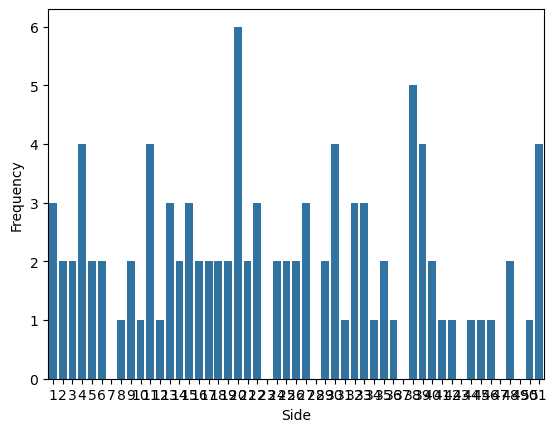

In [15]:
sns.barplot(data=value10, x="Side", y="Frequency")

Out of 10 trials, A card with the value of ten was pulled 35 times

# In Conclusion,

# While the theoretical value predicted that we would have a 2.41% chance of getting our targeted combination of cards, our empirical value stated that our chances of getting our targeted combination of cards were 2.45%. This information confirms my assumption that the chances of pulling an Ace, then a card with the value of ten, were less than 4%.